In [184]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd

import config

In [185]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [186]:
def plot_electricity_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Electricity load [MW]')
    plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [187]:
def plot_total_prediction_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.epoch)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error [MW]')
    # plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [188]:
def calculate_mae(error_abs_value: any) -> float:
    total_absolute_errors = error_abs_value.sum(axis=0)
    mae = total_absolute_errors.mean()
    return mae

In [189]:
print(config.ROOT_PATH)

/home/zhangqiang/work/repos/time-series/utils


## Conventional CLA result

In [190]:
df = load_csv_data(config.predict_results_path)
df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4859.15,NaN,4859.15,4859.15,4859.15,4859.15,4859.15,4859.15,4859.15,4859.15,4859.15,4859.15,NaN
1,2,4773.22,NaN,4773.22,4773.22,4773.22,4773.22,4773.22,4773.22,4773.22,4773.22,4773.22,4773.22,NaN
2,3,4730.26,NaN,4730.26,4730.26,4730.26,4730.26,4730.26,4730.26,4730.26,4730.26,4730.26,4730.26,NaN
3,4,4687.30,NaN,4687.30,4687.30,4687.30,4687.30,4687.30,4687.30,4687.30,4687.30,4687.30,4687.30,NaN
4,5,4579.89,NaN,4579.89,4579.89,4579.89,4579.89,4579.89,4579.89,4579.89,4579.89,4579.89,4579.89,NaN


In [191]:
df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
829826,414911,NaN,NaN,214.820,21.482,214.820,214.820,150.374,214.820,214.820,150.374,214.820,64.446,NaN
829827,414912,NaN,NaN,171.856,42.964,171.856,42.964,42.964,257.784,257.784,42.964,150.374,42.964,NaN
829828,414913,NaN,NaN,193.338,257.784,193.338,128.892,21.482,193.338,193.338,193.338,236.302,193.338,NaN
829829,414914,NaN,NaN,64.446,171.856,42.964,42.964,64.446,64.446,64.446,64.446,171.856,171.856,NaN
829830,414915,NaN,NaN,42.964,279.266,64.446,279.266,193.338,42.964,193.338,85.928,279.266,193.338,NaN


In [192]:
df.iloc[414911:414920]

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
414911,414912,5933.25,NaN,5997.700,5868.800,5997.700,5868.800,5868.800,6083.620,6083.620,5868.800,5976.210,5868.800,NaN
414912,414913,5825.84,NaN,5933.250,5997.700,5933.250,5868.800,5718.430,5933.250,5933.250,5933.250,5976.210,5933.250,NaN
414913,414914,5739.91,NaN,5718.430,5825.840,5611.020,5696.950,5718.430,5718.430,5718.430,5718.430,5825.840,5825.840,NaN
414914,414915,5653.98,NaN,5589.540,5825.840,5611.020,5825.840,5739.910,5589.540,5739.910,5632.500,5825.840,5739.910,NaN
414915,414916,5546.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414916,1,NaN,NaN,85.928,85.928,85.928,85.928,85.928,85.928,85.928,85.928,85.928,85.928,NaN
414917,2,NaN,NaN,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,NaN
414918,3,NaN,NaN,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,42.964,NaN
414919,4,NaN,NaN,107.410,107.410,107.410,107.410,107.410,107.410,107.410,107.410,107.410,107.410,NaN


In [193]:
true_values = df["TRUE"][config.start+1:config.epoch+1]
true_values

414820    5482.13
414821    5374.72
414822    5288.79
414823    5224.34
414824    5138.42
           ...   
414911    5933.25
414912    5825.84
414913    5739.91
414914    5653.98
414915    5546.57
Name: TRUE, Length: 96, dtype: float64

In [194]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values = df[predicted_column][config.start:config.epoch]
predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5696.95,5696.95,5568.06,5568.06,5696.95,5696.95,5696.95,5696.95,5568.06,5696.95
414820,5568.06,5568.06,5417.68,5568.06,5417.68,5417.68,5396.20,5568.06,5568.06,5568.06
414821,5288.79,5568.06,5288.79,5288.79,5417.68,5417.68,5288.79,5417.68,5288.79,5417.68
414822,5417.68,5374.72,5374.72,5417.68,5374.72,5353.24,5417.68,5417.68,5417.68,5417.68
414823,5288.79,5374.72,5288.79,5288.79,5374.72,5288.79,5288.79,5288.79,5288.79,5288.79
...,...,...,...,...,...,...,...,...,...,...
414910,6148.07,5911.77,6148.07,6148.07,6083.62,6148.07,6148.07,6083.62,6148.07,5868.80
414911,5997.70,5868.80,5997.70,5868.80,5868.80,6083.62,6083.62,5868.80,5976.21,5868.80
414912,5933.25,5997.70,5933.25,5868.80,5718.43,5933.25,5933.25,5933.25,5976.21,5933.25
414913,5718.43,5825.84,5611.02,5696.95,5718.43,5718.43,5718.43,5718.43,5825.84,5825.84


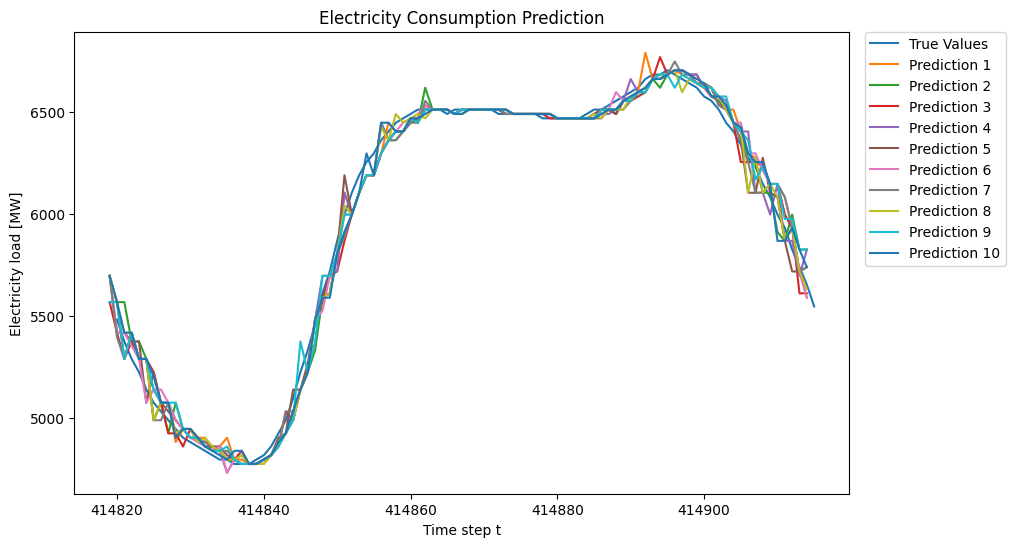

In [195]:
plot_electricity_load(true_values, predicted_values)

In [196]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value = df[predicted_column][config.error_abs_start:config.error_abs_end]
error_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,85.928,257.784,257.784,2.577840e+02,257.784,322.230,322.230,257.784,257.784,257.784
829735,214.820,214.820,85.928,8.592800e+01,214.820,214.820,214.820,214.820,85.928,214.820
829736,193.338,193.338,42.964,1.933380e+02,42.964,42.964,21.482,193.338,193.338,193.338
829737,0.000,279.266,0.000,0.000000e+00,128.892,128.892,0.000,128.892,0.000,128.892
829738,193.338,150.374,150.374,1.933380e+02,150.374,128.892,193.338,193.338,193.338,193.338
...,...,...,...,...,...,...,...,...,...,...
829825,150.374,107.410,150.374,9.094950e-13,107.410,150.374,150.374,150.374,150.374,150.374
829826,214.820,21.482,214.820,2.148200e+02,150.374,214.820,214.820,150.374,214.820,64.446
829827,171.856,42.964,171.856,4.296400e+01,42.964,257.784,257.784,42.964,150.374,42.964
829828,193.338,257.784,193.338,1.288920e+02,21.482,193.338,193.338,193.338,236.302,193.338


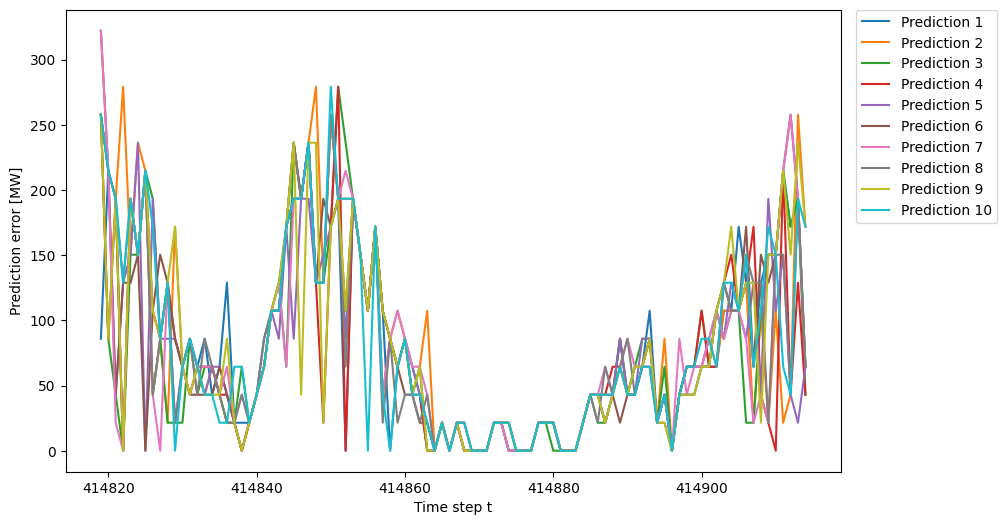

In [197]:
plot_total_prediction_error(error_abs_value)

In [198]:
mae = calculate_mae(error_abs_value)
print("MAE:", mae)

MAE: 7495.069800000009


## Inf result

In [199]:
df_inf = load_csv_data(config.predict_inf_results_path)
df_inf.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4750.0,NaN,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,NaN
1,2,4750.0,NaN,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,NaN
2,3,4750.0,NaN,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,NaN
3,4,4750.0,NaN,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,4750.0,NaN
4,5,4500.0,NaN,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,NaN


In [200]:
true_inf_values = df_inf["TRUE"][config.start+1:config.epoch+1]
true_inf_values

414820    5500.0
414821    5500.0
414822    5250.0
414823    5250.0
414824    5250.0
           ...  
414911    6000.0
414912    5750.0
414913    5750.0
414914    5750.0
414915    5500.0
Name: TRUE, Length: 96, dtype: float64

In [201]:
predicted_inf_values = df_inf[predicted_column][config.start:config.epoch]
predicted_inf_values

,1,2,3,4,5,6,7,8,9,10
414819,5750.0,5750.0,5750.0,5750.0,5750.0,5750.0,5750.0,5750.0,5750.0,5750.0
414820,5500.0,5500.0,5250.0,5750.0,5750.0,5250.0,5250.0,5750.0,5750.0,5500.0
414821,5750.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0
414822,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0
414823,5500.0,5250.0,5000.0,5500.0,5000.0,5500.0,5250.0,5000.0,5500.0,5500.0
...,...,...,...,...,...,...,...,...,...,...
414910,6250.0,6250.0,6250.0,5750.0,6250.0,6250.0,6000.0,6250.0,5750.0,5750.0
414911,6000.0,6000.0,6000.0,6000.0,5500.0,6000.0,6000.0,6000.0,6000.0,6000.0
414912,6000.0,5500.0,6000.0,6000.0,6000.0,6000.0,5500.0,6000.0,6000.0,6000.0
414913,5500.0,5500.0,5500.0,5500.0,6000.0,5750.0,5500.0,5500.0,6000.0,6000.0


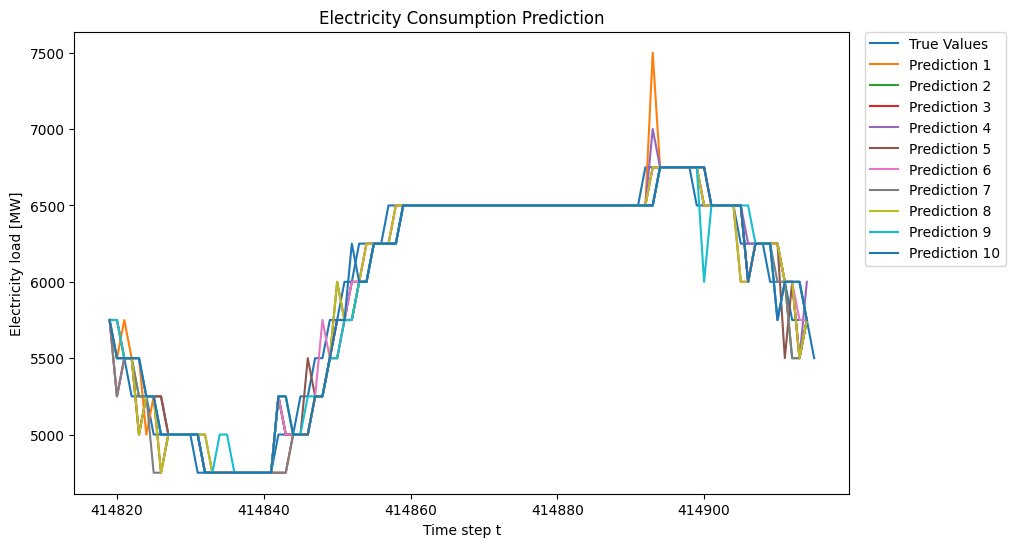

In [202]:
plot_electricity_load(true_inf_values, predicted_inf_values)

In [203]:
# abs(outputdata[n][a] - inputdata[a+1])
error_inf_abs_value = df_inf[predicted_column][config.error_abs_start:config.error_abs_end]
error_inf_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,500.0,500.0,250.0,0.0,0.0,500.0,0.0,250.0,250.0,250.0
829735,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
829736,0.0,0.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,0.0
829737,500.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
829738,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
...,...,...,...,...,...,...,...,...,...,...
829825,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
829826,250.0,250.0,250.0,250.0,250.0,250.0,0.0,250.0,250.0,250.0
829827,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
829828,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0


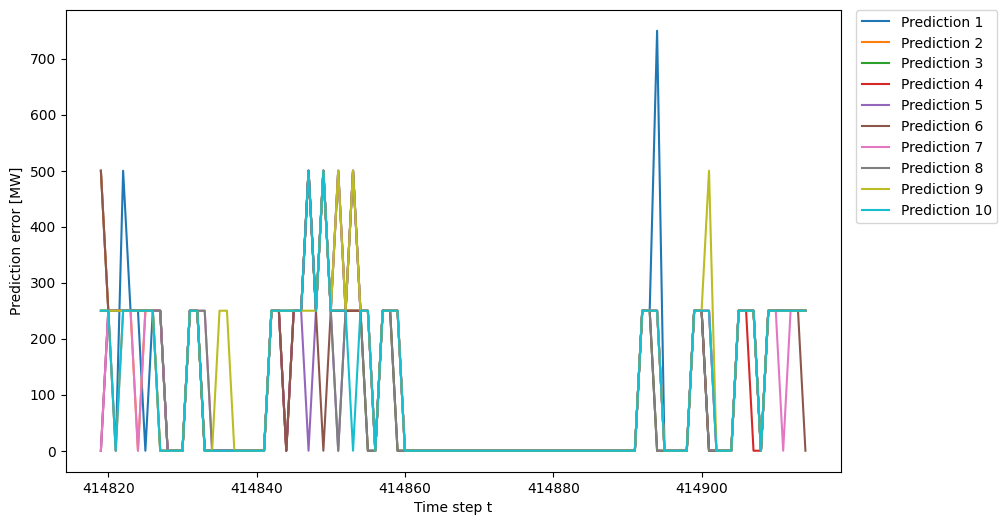

In [204]:
plot_total_prediction_error(error_inf_abs_value)

In [205]:
mae = calculate_mae(error_inf_abs_value)
print("MAE:", mae)

MAE: 10700.0


## 100

In [206]:
df_100 = load_csv_data(config.predict_100_results_path)
df_100.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4849.61,NaN,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,NaN
1,2,4783.67,NaN,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,NaN
2,3,4739.70,NaN,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,NaN
3,4,4673.76,NaN,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,NaN
4,5,4585.83,NaN,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,NaN


In [207]:
true_100_values = df_100["TRUE"][config.start+1:config.epoch+1]
true_100_values

414820    5487.09
414821    5377.18
414822    5289.25
414823    5223.31
414824    5135.38
           ...   
414911    5926.73
414912    5838.81
414913    5750.88
414914    5640.97
414915    5531.06
Name: TRUE, Length: 96, dtype: float64

In [208]:
predicted_100_values = df_100[predicted_column][config.start:config.epoch]
predicted_100_values

,1,2,3,4,5,6,7,8,9,10
414819,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93
414820,5597.00,5421.15,5684.93,5640.97,5553.04,5684.93,5553.04,5553.04,5553.04,5421.15
414821,5553.04,5421.15,5487.09,5487.09,5487.09,5553.04,5553.04,5553.04,5553.04,5421.15
414822,5377.18,5377.18,5179.34,5377.18,5377.18,5421.15,5421.15,5421.15,5421.15,5487.09
414823,5289.25,5289.25,5113.40,5289.25,5289.25,5135.38,5355.20,5289.25,5289.25,5289.25
...,...,...,...,...,...,...,...,...,...,...
414910,6080.61,5860.79,5904.75,5904.75,6080.61,5860.79,6102.59,6080.61,6102.59,6102.59
414911,5992.68,5860.79,5860.79,5992.68,5860.79,5860.79,5860.79,5992.68,5860.79,5860.79
414912,5728.90,5728.90,5794.84,5926.73,5926.73,5926.73,5728.90,5926.73,5926.73,5926.73
414913,5728.90,5728.90,5838.81,5926.73,5728.90,5838.81,5728.90,5838.81,5838.81,5926.73


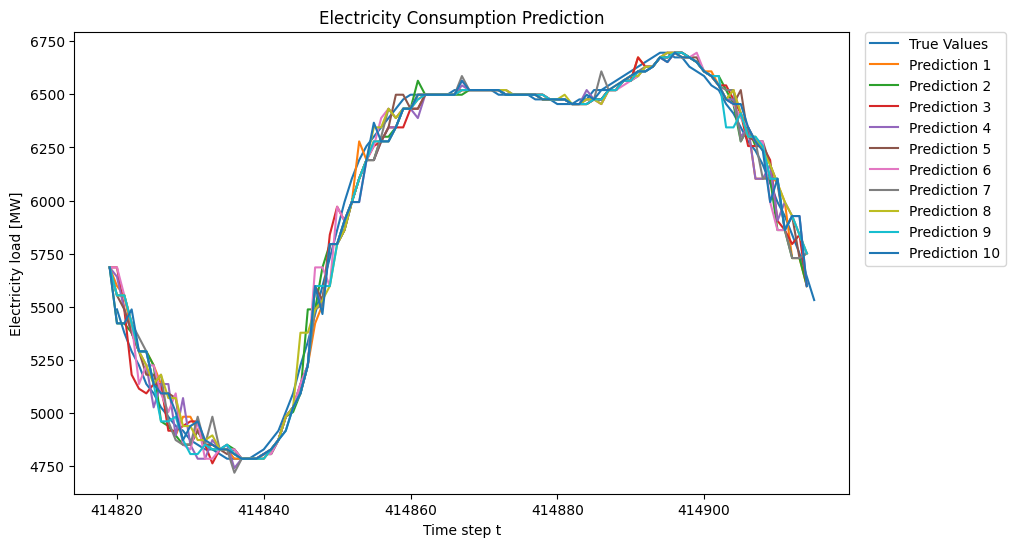

In [209]:
plot_electricity_load(true_100_values, predicted_100_values)

In [210]:
# abs(outputdata[n][a] - inputdata[a+1])
error_100_abs_value = df_100[predicted_column][config.error_abs_start:config.error_abs_end]
error_100_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,241.802,197.838,197.838,197.838,197.838,197.838,241.802,197.838,21.982,197.838
829735,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838
829736,219.820,43.964,307.748,263.784,175.856,307.748,175.856,175.856,175.856,43.964
829737,263.784,131.892,197.838,197.838,197.838,263.784,263.784,263.784,263.784,131.892
829738,153.874,153.874,43.964,153.874,153.874,197.838,197.838,197.838,197.838,263.784
...,...,...,...,...,...,...,...,...,...,...
829825,131.892,109.910,197.838,175.856,175.856,0.000,109.910,175.856,109.910,0.000
829826,153.874,65.946,21.982,21.982,153.874,65.946,175.856,153.874,175.856,175.856
829827,153.874,21.982,21.982,153.874,21.982,21.982,21.982,153.874,21.982,21.982
829828,21.982,21.982,43.964,175.856,175.856,175.856,21.982,175.856,175.856,175.856


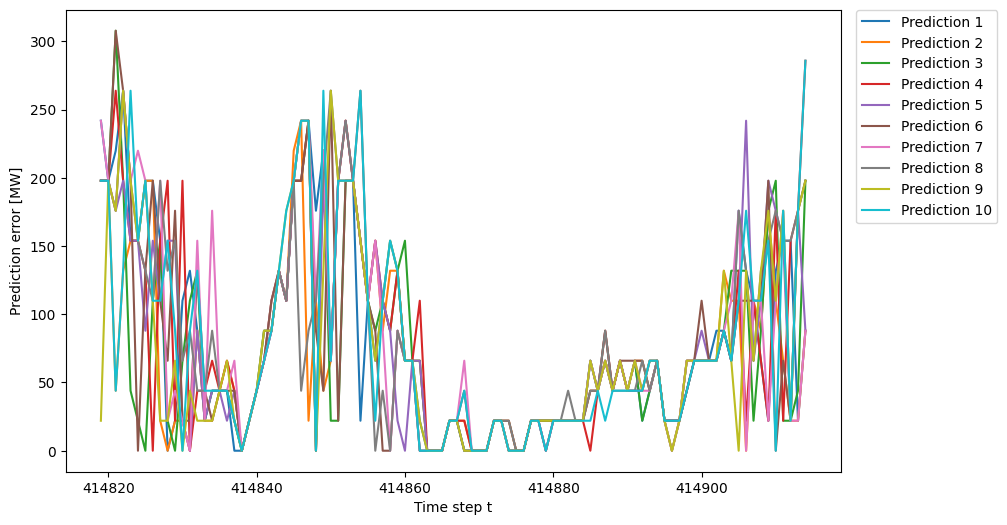

In [211]:
plot_total_prediction_error(error_100_abs_value)

In [212]:
mae = calculate_mae(error_100_abs_value)
print("MAE:", mae)

MAE: 7418.9250000000075
